In [1]:
#网络结构：
#输入层：4 个神经元

#隐藏层1：5 个神经元，激活函数使用 ReLU

#隐藏层2：3 个神经元，激活函数使用 Tanh

#输出层：2 个神经元，使用 Softmax，用于 2 分类任务（标签为 one-hot 向量）

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#计算softmax激活函数
def softmax(a):
  a_max = np.max(a, axis=1, keepdims=True)
  z = np.exp(a - a_max)

  sums = np.sum(z, axis=1, keepdims=True)

  return z / sums

In [5]:
#前向传播，计算y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.dot(x, w1) + b1 #shape (2,5)
  h1 = np.maximum(0, z1)

  z2 = np.dot(h1, w2) + b2 #shape (2,3)
  h2 = np.tanh(z2)

  z3 = np.dot(h2, w3) + b3 #shape (2,2)
  y_pred = softmax(z3) #shape (2,2)
  return z1, h1, h2, y_pred

In [6]:
#计算损失函数loss
def compute_loss(y_pred, y_true):
  loss = -(np.sum(y_true * np.log(y_pred + 1e-10)) / y_pred.shape[0])
  return loss

In [11]:
#反向传播，计算梯度
def backward(y_pred, y_true, h1, h2, z1, w2, w3, x):
  dz3 = y_pred - y_true
  b3_grad = np.mean(dz3, axis=0, keepdims=True).flatten()
  w3_grad = np.dot(h2.T, dz3) / h2.shape[0] # shape(3,2)

  dh2 = np.dot(dz3, w3.T) # shape(2,3)
  dz2 = dh2 * (1 - h2**2) # shape(2,3)
  b2_grad = np.mean(dz2, axis=0, keepdims=True).flatten()
  w2_grad = np.dot(h1.T, dz2) / h1.shape[0] # shape (5,3)

  dh1 = np.dot(dz2, w2.T) # shape(2,5)
  dz1 = dh1 * (z1 > 0)
  b1_grad = np.mean(dz1, axis=0, keepdims=True).flatten()
  w1_grad = np.dot(x.T, dz1) / x.shape[0]#shape (4,5)

  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [13]:
#更新参数值
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

epoch: 1 loss 0.6982 y_pred [0.45 0.55 0.45 0.55] w1 [ 0.05 -0.01  0.06  0.15 -0.02 -0.02  0.16  0.08 -0.05  0.05 -0.05 -0.05
  0.02 -0.19 -0.17 -0.06 -0.1   0.03 -0.09 -0.14] w2 [ 0.01 -0.12  0.04 -0.06 -0.03 -0.06  0.19 -0.   -0.11  0.08 -0.12  0.02
 -0.2  -0.13  0.02] w3 [-0.03 -0.15 -0.07 -0.05  0.11  0.03] b1 [ 0.15 -0.02  0.01 -0.14 -0.05] b2 [ 0.07  0.02 -0.01] b3 [-0.18  0.03]
epoch: 101 loss 0.695 y_pred [0.47 0.53 0.47 0.53] w1 [ 0.05 -0.01  0.06  0.15 -0.02 -0.02  0.16  0.08 -0.05  0.05 -0.05 -0.05
  0.02 -0.19 -0.17 -0.05 -0.1   0.03 -0.09 -0.14] w2 [ 0.01 -0.11  0.04 -0.06 -0.03 -0.06  0.19 -0.   -0.11  0.08 -0.12  0.02
 -0.2  -0.13  0.02] w3 [-0.03 -0.15 -0.07 -0.05  0.1   0.04] b1 [ 0.15 -0.02  0.01 -0.14 -0.05] b2 [ 0.08  0.02 -0.01] b3 [-0.14 -0.01]
epoch: 201 loss 0.6939 y_pred [0.48 0.52 0.48 0.52] w1 [ 0.05 -0.01  0.06  0.15 -0.02 -0.02  0.16  0.08 -0.05  0.05 -0.05 -0.05
  0.02 -0.19 -0.17 -0.05 -0.1   0.04 -0.09 -0.14] w2 [ 0.01 -0.11  0.04 -0.06 -0.03 -0.06  0.19

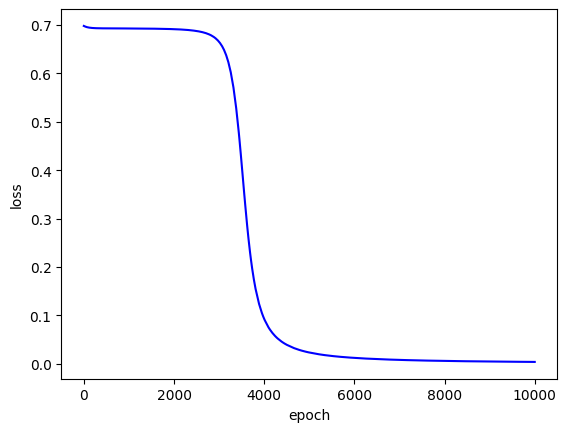

In [16]:
# 设置随机数种子以保证可复现
np.random.seed(42)

# 网络层次：
# 输入层：4 个神经元
# 隐藏层1：5 个神经元 => W1 shape: (4, 5), b1 shape: (5,)
# 隐藏层2：3 个神经元 => W2 shape: (5, 3), b2 shape: (3,)
# 输出层：2 个神经元    => W3 shape: (3, 2), b3 shape: (2,)

w1 = np.random.randn(4, 5) * 0.1 #shape (4,5)
b1 = np.random.randn(5) * 0.1 #shape (1,5)

w2 = np.random.randn(5, 3) * 0.1 #shape (5,3)
b2 = np.random.randn(3) * 0.1 #shape (1,3)

w3 = np.random.randn(3, 2) * 0.1 #shape (3,2)
b3 = np.random.randn(2) * 0.1 #shape (1,2)

x = np.array([[0.2, 0.5, 0.1, 0.9],
        [0.7, 0.3, 0.6, 0.2]]) #shape (2,4)

y_true = np.array([[1, 0],
          [0, 1]]) #shape (2,2)

losses = []
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
  z1, h1, h2, y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(y_pred, y_true, h1, h2, z1, w2, w3, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%100 == 0:
    print("epoch:", epoch + 1,
      "loss", np.round(loss, 4),
      "y_pred", np.round(y_pred.flatten(), 2),
      "w1", np.round(w1.flatten(), 2),
      "w2", np.round(w2.flatten(), 2),
      "w3", np.round(w3.flatten(), 2),
      "b1", np.round(b1.flatten(), 2),
      "b2", np.round(b2.flatten(), 2),
      "b3", np.round(b3.flatten(), 2),
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


In [17]:
import torch
import matplotlib.pyplot as plt

In [19]:
#前向传播，计算y_pred
def th_forward(w1, w2, w3, b1, b2, b3, x):
  z1 = torch.matmul(x, w1) + b1 #shape (2,5)
  h1 = torch.relu(z1)

  z2 = torch.matmul(h1, w2) + b2 #shape (2,3)
  h2 = torch.tanh(z2)

  z3 = torch.matmul(h2, w3) + b3 #shape (2,2)
  y_pred = torch.softmax(z3, dim=1) #shape (2,2)
  return z1, h1, h2, y_pred

In [20]:
#计算损失函数loss
def th_compute_loss(y_pred, y_true):
  loss = -(torch.sum(y_true * torch.log(y_pred + 1e-10)) / y_pred.shape[0])
  return loss

epoch: 1 loss: 0.6932 y_pred: [0.49 0.51 0.49 0.51] w1: [ 0.12  0.   -0.05 -0.08 -0.1   0.13 -0.08  0.16 -0.    0.03 -0.15 -0.1
 -0.11  0.1   0.13  0.08 -0.01 -0.09 -0.13  0.04] w2: [ 0.02 -0.01 -0.07 -0.08  0.15 -0.1  -0.14  0.06 -0.03  0.   -0.04  0.07
  0.11 -0.09  0.13] w3: [ 0.04  0.04 -0.06  0.05 -0.07  0.05] b1: [-0.   -0.17  0.06  0.07 -0.03] b2: [0.08 0.03 0.06] b3: [0.06 0.09]
epoch: 101 loss: 0.6930 y_pred: [0.49 0.51 0.49 0.51] w1: [ 0.12  0.   -0.05 -0.08 -0.1   0.13 -0.08  0.16 -0.    0.03 -0.15 -0.1
 -0.11  0.1   0.13  0.08 -0.01 -0.09 -0.13  0.04] w2: [ 0.02 -0.02 -0.07 -0.08  0.15 -0.1  -0.14  0.06 -0.04  0.   -0.04  0.07
  0.11 -0.09  0.13] w3: [ 0.04  0.04 -0.06  0.05 -0.07  0.06] b1: [-0.   -0.17  0.06  0.07 -0.03] b2: [0.08 0.03 0.06] b3: [0.07 0.08]
epoch: 201 loss: 0.6928 y_pred: [0.5 0.5 0.5 0.5] w1: [ 0.12  0.   -0.05 -0.07 -0.1   0.13 -0.08  0.16 -0.    0.03 -0.16 -0.1
 -0.11  0.1   0.13  0.08 -0.01 -0.09 -0.13  0.04] w2: [ 0.02 -0.02 -0.07 -0.08  0.15 -0.1  -

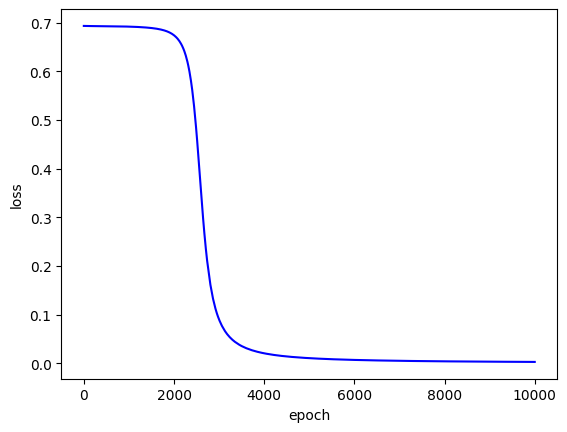

In [37]:
# 设置随机数种子以保证可复现
np.random.seed(42)

# 网络层次：
# 输入层：4 个神经元
# 隐藏层1：5 个神经元 => W1 shape: (4, 5), b1 shape: (5,)
# 隐藏层2：3 个神经元 => W2 shape: (5, 3), b2 shape: (3,)
# 输出层：2 个神经元    => W3 shape: (3, 2), b3 shape: (2,)

w1 = torch.randn(4, 5) * 0.1 #shape (4,5)
w1.requires_grad=True

b1 = torch.randn(5) * 0.1 #shape (1,5)
b1.requires_grad=True

w2 = torch.randn(5, 3) * 0.1 #shape (5,3)
w2.requires_grad=True
b2 = torch.randn(3) * 0.1 #shape (1,3)
b2.requires_grad=True

w3 = torch.randn(3, 2) * 0.1 #shape (3,2)
w3.requires_grad=True
b3 = torch.randn(2) * 0.1 #shape (1,2)
b3.requires_grad=True

x = torch.tensor([[0.2, 0.5, 0.1, 0.9],
          [0.7, 0.3, 0.6, 0.2]]) #shape (2,4)

y_true = torch.tensor([[1, 0],
            [0, 1]]) #shape (2,2)

losses = []
learning_rate = 0.01
epochs = 10000

for epoch in range(epochs):
  z1, h1, h2, y_pred = th_forward(w1, w2, w3, b1, b2, b3, x)
  loss = th_compute_loss(y_pred, y_true)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}",
      f"y_pred: {y_pred.flatten().detach().numpy().round(2)}",
      f"w1: {w1.flatten().detach().numpy().round(2)}",
      f"w2: {w2.flatten().detach().numpy().round(2)}",
      f"w3: {w3.flatten().detach().numpy().round(2)}",
      f"b1: {b1.flatten().detach().numpy().round(2)}",
      f"b2: {b2.flatten().detach().numpy().round(2)}",
      f"b3: {b3.flatten().detach().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
